# Data Science Lab: Lab 2

Download data from Canvas/Files/Datasets/Lab2Data.zip

Submit:
1. A pdf of your notebook with solutions.
2. A link to your colab notebook or also upload your .ipynb if not working on colab.

# Goals of this Lab

1. Continue reviewing some important tools from probability and linear algebra, and linking these to why we need them for data science, and how to use them in Python.
2. Specifically: the relationship between the covariance matrix and how skewed data points are. How to skew and unskew.
3. This also starts giving us ideas on how to explore our data, and think about pre-processing the data.


In [25]:
# Some useful libraries
import numpy as np
import scipy as sp
import math

#Pandas for data structure and analysis tools
import pandas as pd

#seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#for nice vector graphics
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

from numpy.random import default_rng
np.random.seed(42) # Fixed seed for reproducibility
rng = default_rng()

C:\Users\tonys\AppData\Local\Temp\ipykernel_24628\827439876.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Problem 1

Recall from the previous lab, that we saw that the eigenvalues of the covariance matrix give us the major and minor axes of the ellipse of the data points.


**Problem 1, Part 1.**

The code below provides another illustration of this. **Generate a few different plots, with different rotations of the covariance matrix**. I've provided all the code below. You just need to understand it and do some cut-and-paste to run it a couple times.





[]

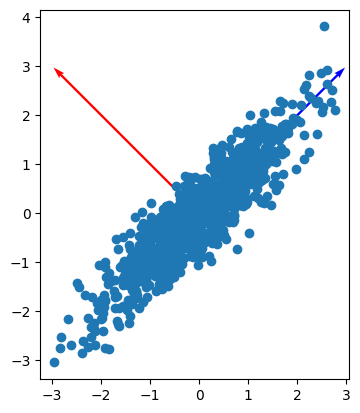

In [49]:
#1000 samples from bivariate Normal distribution
#with given mu and covariance matrix

samples = 1000
mu = [0, 0] # Mean at the origin (0,0)
cov = [[1, 0.9], [0.9, 1]] # covariance matrix
L, V = np.linalg.eigh(cov) # get the eigenvectors of the covariance matrix
#Vs = np.dot(V,np.diag(L)).T # scale by the eigenvalues
X = rng.multivariate_normal(mu, cov, samples) # generate the points

# We can plot the points to see what they look like
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=1.5)
plt.scatter(X[:,0], X[:,1])
axes = plt.gca()
# axes.set_aspect(1) # set aspect ratio to 1 to see the alignment
axes.set_aspect('equal','box')

plt.plot()
# plt.axis('equal')


In [50]:
X

array([[ 0.50297856,  0.53719758],
       [-0.49146871, -0.05153931],
       [ 1.33067133,  1.50843871],
       ...,
       [ 0.9564662 ,  0.18326787],
       [ 1.50495393,  1.7220335 ],
       [-0.7670699 , -0.75477205]])

[]

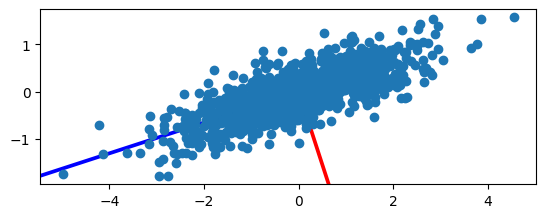

In [51]:
# Recall the form of a rotation matrix in 2D
samples = 1000
# Try different values of theta
# for example, theta = -1/8, or theta = -1/4 to align with axes
theta = -0.15*math.pi #radians
R = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta),math.cos(theta)]])
mu2 = [0, 0] # Mean at the origin (0,0)
cov2 = np.dot(np.dot(R,[[1, 0.9], [0.9, 1]]),R.T) # covariance matrix
L2, V2 = np.linalg.eigh(cov2) # get the eigenvectors of the covariance matrix
X2 = rng.multivariate_normal(mu2, cov2, samples) # generate the points

# We can plot the points to see what they look like
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, V2[:,0], V2[:,1], color=['r','b'], scale=1.5)
plt.scatter(X2[:,0], X2[:,1])
axes2 = plt.gca()
axes2.set_aspect(1) # set aspect ratio to 1 to see the alignment
#axes2.set_aspect('equal', 'box')
plt.plot()

[]

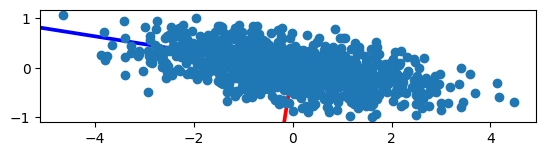

In [141]:
# Recall the form of a rotation matrix in 2D
samples = 1000
# Try different values of theta
# for example, theta = -1/8, or theta = -1/4 to align with axes
theta = -0.30*math.pi #radians
R = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta),math.cos(theta)]])
mu2 = [0, 0] # Mean at the origin (0,0)
cov2 = np.dot(np.dot(R,[[1, 0.9], [0.9, 1]]),R.T) # covariance matrix
L2, V2 = np.linalg.eigh(cov2) # get the eigenvectors of the covariance matrix
X2 = rng.multivariate_normal(mu2, cov2, samples) # generate the points

# We can plot the points to see what they look like
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, V2[:,0], V2[:,1], color=['r','b'], scale=1.5)
plt.scatter(X2[:,0], X2[:,1])
axes2 = plt.gca()
axes2.set_aspect(1) # set aspect ratio to 1 to see the alignment
#axes2.set_aspect('equal', 'box')
plt.plot()

**Problem 1 Part 2:**

Generate 1,000 points from the original covariance matrix given above, call this $\Sigma$. Form the matrix:

$$
S = (\Sigma^{1/2})^{-1},
$$
i.e., the inverse matrix square root. You can compute this directly using the scipy command I've provided below.

*Challenge question (optional): try to do this using only the numpy function np.linalg.eigh*

Multiply each of the 1,000 points on the left by this matrix $S$, and plot them. If you do this right, you should get a cloud of points that looks spherical -- i.e., no rotation, no elongation.

In [52]:

print("Challenge question (optional): try to do this using only the numpy function np.linalg.eigh")

sigma=cov
# print(sigma)

eigenvals,eigenvectors=np.linalg.eigh(sigma)
sqrt_eigenvals=np.sqrt(eigenvals)

# print(np.diag(eigenvals)) #change it to diagnol matrix (eigenvalue)

sqrt_sigma=eigenvectors@np.diag(sqrt_eigenvals)@eigenvectors.T
S_ans=np.linalg.inv(sqrt_sigma)

print(S_ans)

Challenge question (optional): try to do this using only the numpy function np.linalg.eigh
[[ 1.94387696 -1.21840071]
 [-1.21840071  1.94387696]]


In [53]:
np.array([[1,2],[0,0]])@np.array([[2,2],[3,4]])

array([[ 8, 10],
       [ 0,  0]])

[[ 1.94387696 -1.21840071]
 [-1.21840071  1.94387696]]


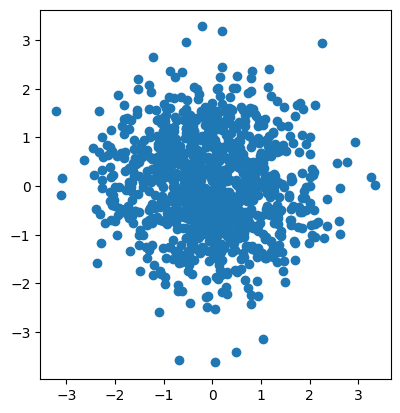

In [150]:
# Generate 1000 points from the original covariance matrix.

# Now multiply each point on the left by the matrix
# that is the inverse matrix-square-root
S = sp.linalg.inv(sp.linalg.sqrtm(cov))
print(S)
samples = 1000

mu = [0, 0] # Mean at the origin (0,0)
S_cov = S # covariance matrix

#Vs = np.dot(V,np.diag(L)).T # scale by the eigenvalues
X = rng.multivariate_normal(mu, cov, samples) # generate the points

X = X@S_cov
plt.scatter(X[:,0],X[:,1])
axes2 = plt.gca()
axes2.set_aspect(1) # set aspect ratio to 1 to see the alignment

# axes2.set_aspect('equal', 'box')
# plt.axis('equal')
# Unskew the data and plot

# Problem 2: Two Uses of the Above

**Problem 2 Part 1**

Load the data X_aniso.npy, and plot it. You will see that it looks like a single elongated cloud of points.

(5000, 2)
[[3.12944233 3.40060313]
 [2.05762303 2.10349913]
 [2.70758344 3.01302436]
 ...
 [3.21477817 3.48110418]
 [1.65601102 1.6602597 ]
 [2.61172501 2.89365986]]


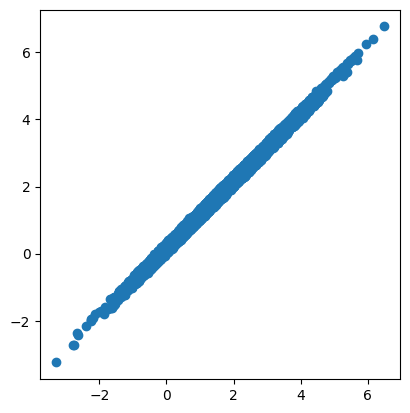

In [153]:
data=np.load("Lab2Data/X_aniso.npy")
print(data.shape)
print(data)

plt.scatter(data[:,0],data[:,1])
axes2 = plt.gca()
axes2.set_aspect(1)
axes2.set_aspect("equal",'box')

**Problem 2, Part 2**

Compute a transformation, i.e., a 2 by 2 matrix, to unskew the data. Left multiply each point by this matrix, and plot the tranformed data.

If you do this correctly, you will clearly be able to see that the data in fact form 2 clusters, not just 1.

*Aside: clustering algorithms like K-Means Clustering and Spectral Clustering, will fail on the skewed data, but will succeed in identifying the clusters once the data have been unskewed.*

In [160]:
data

array([[3.12944233, 3.40060313],
       [2.05762303, 2.10349913],
       [2.70758344, 3.01302436],
       ...,
       [3.21477817, 3.48110418],
       [1.65601102, 1.6602597 ],
       [2.61172501, 2.89365986]])

In [168]:
temp=np.array([data[:,0],data[:,1]])
temp
print(temp)
cov=np.cov(temp)

[[3.12944233 2.05762303 2.70758344 ... 3.21477817 1.65601102 2.61172501]
 [3.40060313 2.10349913 3.01302436 ... 3.48110418 1.6602597  2.89365986]]


[[ 0.14258746  3.40322598]
 [ 0.91446168  1.34985438]
 [-0.31566575  3.41937224]
 ...
 [ 0.22227195  3.41403672]
 [ 0.9384861   0.86732473]
 [-0.22582183  3.21321648]]


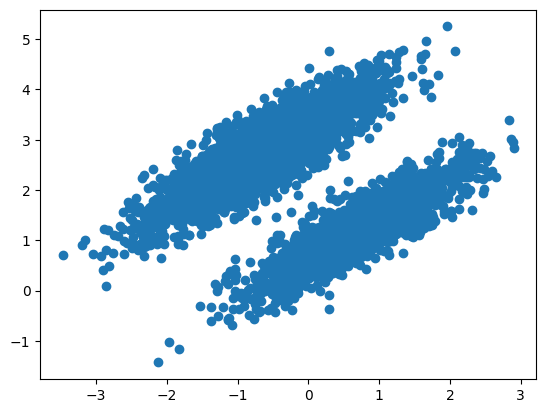

In [169]:
S = sp.linalg.inv(sp.linalg.sqrtm(cov))

transform_data=data@S
print(transform_data)

plt.scatter(transform_data[:,0],transform_data[:,1])

**Problem 2, Part 3**

Load the data in DF2, and plot it. Note that it seems that there are two points that are "outliers." We want to understand which point is more of an outlier.



[[1.0385016  0.83505255]
 [0.32045475 0.1490789 ]
 [0.05548035 0.27167175]
 ...
 [0.89069697 1.07275134]
 [0.47529316 0.53690942]
 [1.20740565 1.23079676]]


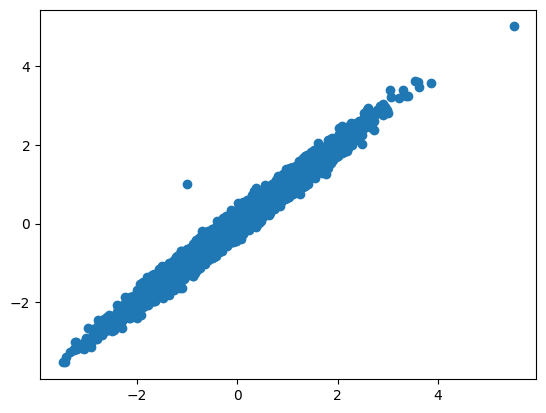

In [171]:
data=pd.read_csv("Lab2Data/DF2",header=None,dtype=np.float64)
data=pd.DataFrame(data)

data=data.drop(columns=[0],index=0)

data=np.array(data)


plt.scatter(data[:,0],data[:,1])


**Problem 2, Part 4**

Unskew the data in a similar way, and plot the result again.
If you do this correctly, you will see that one of the points is clearly far more of an outlier.

We can now compare the points, because what we have done is tranformed the data to have identify covariance. That means that the variance *in each direction* is 1, and hence we can directly compare and see that the points north west of the mass of points is more standard deviations away from the bulk of points, than the other point.

[[ 1.67059188 -0.3455702 ]
 [ 1.01575115 -0.68382202]
 [-0.9567023   1.18835662]
 ...
 [-0.20960742  1.59865133]
 [ 0.05182477  0.66422273]
 [ 0.74493776  0.97974232]]


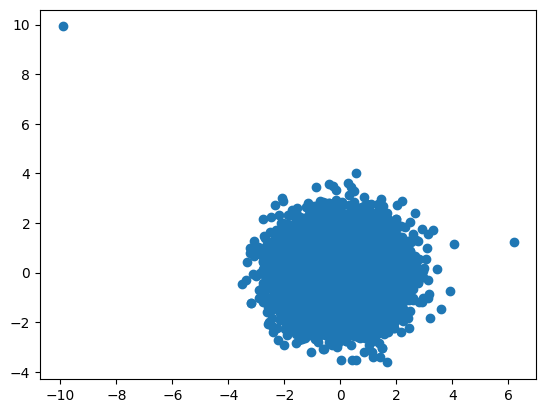

In [172]:

cov=np.cov(np.array([data[:,0],data[:,1]]))
S = sp.linalg.inv(sp.linalg.sqrtm(cov))

unscrew_data=data@S

print(unscrew_data)
plt.scatter(unscrew_data[:,0],unscrew_data[:,1])
axes2 = plt.gca()


# Problem 3

**Correlations.**

* When given a data matrix, an easy way to tell if any two columns are correlated is to look at a scatter plot of each column against each other column.  For a warm up, do this: Look at the data in DF1 in Lab2.zip.  Which columns are (pairwise) correlated?  Figure out how to do this with Pandas, and also how to do this with Seaborn.

* Compute the covariance matrix of the data.  You can use  any  command  you  like for this (e.g.,  np.cov)  to  compute  the  4×4  matrix. Explain why the numbers that you get fit with the plots you got.

In [178]:
data=pd.read_csv("Lab2Data/DF1")
data=pd.DataFrame(data)

data=data.drop(columns=['Unnamed: 0'])
data

0         1         2         3
0     1.038502  0.899865  0.835053 -0.971528
1     0.320455 -0.647459  0.149079  0.352593
2     0.055480  2.234771  0.271672 -2.108739
3    -0.007260 -0.524299 -0.126550  0.670827
4    -1.237390 -1.377017 -1.049932  1.342079
...        ...       ...       ...       ...
9995 -0.632309 -0.145873 -0.797517  0.436184
9996  0.679417 -0.530216  0.526470  0.439397
9997  0.890697 -2.210855  1.072751  2.285372
9998  0.475293  0.490971  0.536909 -0.195772
9999  1.207406  0.819239  1.230797 -0.752397

[10000 rows x 4 columns]

          0         1         2         3
0  1.000000 -0.003998  0.990066  0.004111
1 -0.003998  1.000000 -0.004085 -0.990235
2  0.990066 -0.004085  1.000000  0.004067
3  0.004111 -0.990235  0.004067  1.000000


<Axes: >

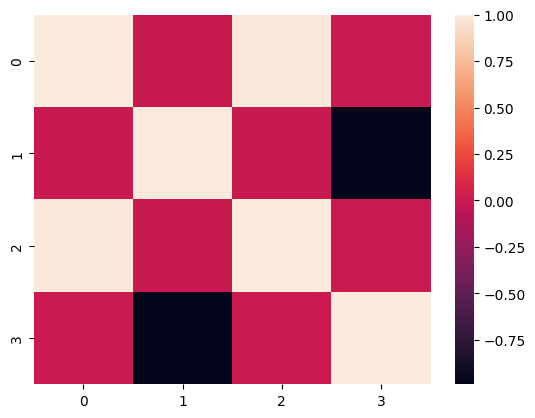

In [179]:
#using heatmap to compare all the correlations

print(data.corr())

sns.heatmap(data.corr())

In [180]:
data[data.columns[0]]

0       1.038502
1       0.320455
2       0.055480
3      -0.007260
4      -1.237390
          ...   
9995   -0.632309
9996    0.679417
9997    0.890697
9998    0.475293
9999    1.207406
Name: 0, Length: 10000, dtype: float64

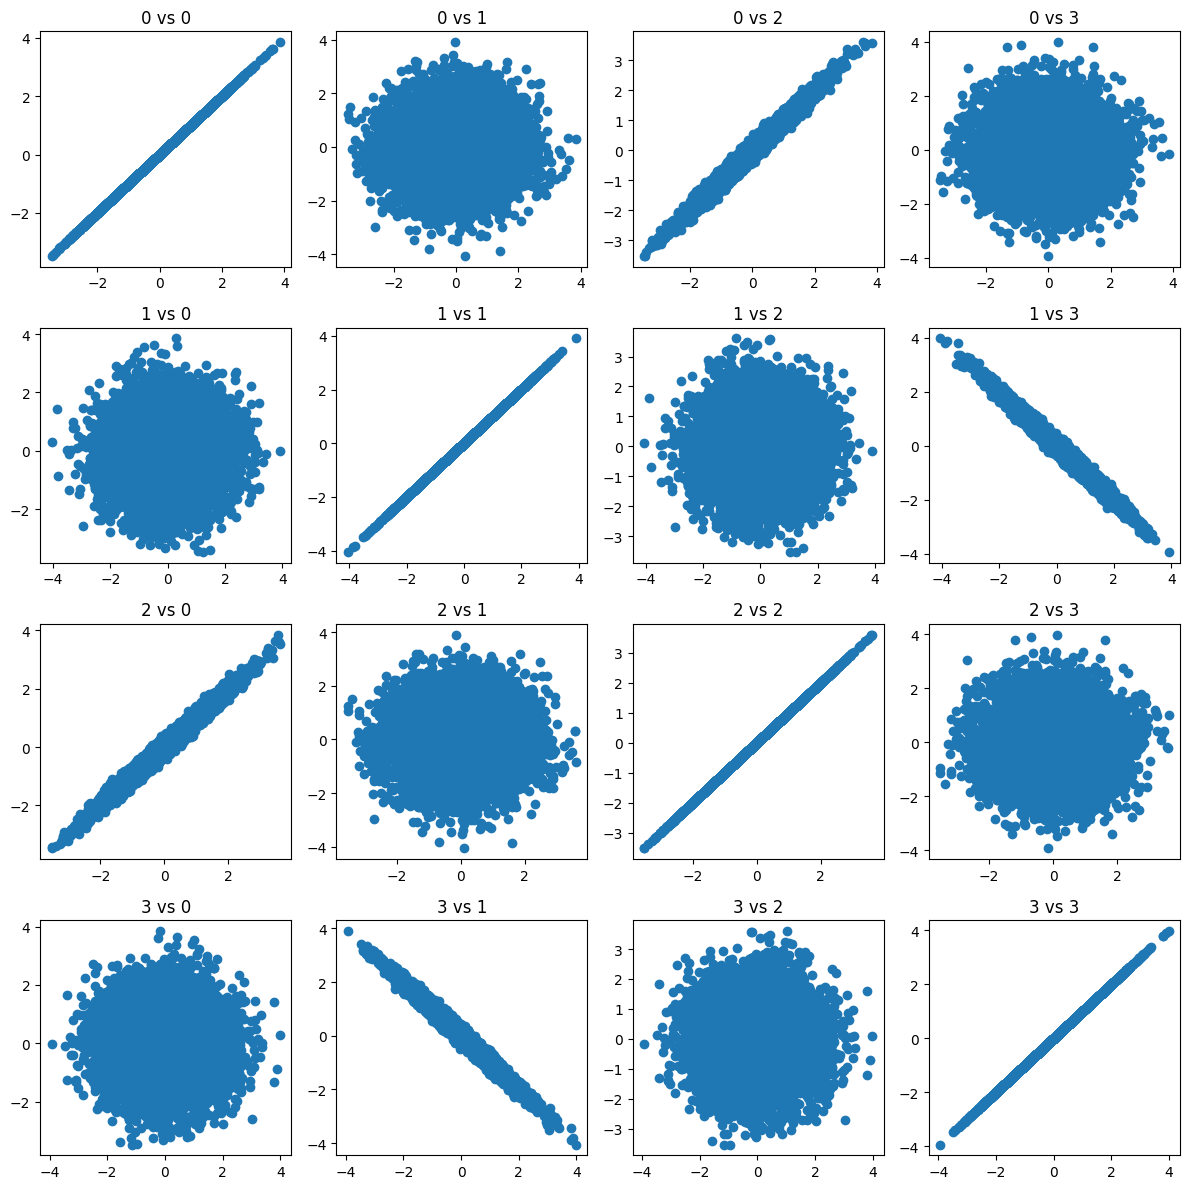

In [188]:
#using pandas to compare all the correlations

fig, axs = plt.subplots(4, 4, figsize=(12, 12))  # Create a 4x4 grid

# Loop through rows and columns of the subplot grid
for i in range(4):
    for j in range(4):
        axs[i, j].scatter(data[data.columns[i]], data[data.columns[j]])
        axs[i, j].set_title(f'{data.columns[i]} vs {data.columns[j]}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Problem 4: Linear Regression

There are several main goals for this problem.
1. This will help us remember that the solution to a regression problem *is a random variable* since after all, it calculated from random data.
2. Since it is a random variable, it therefore has a mean and variance. We will be computing these analytically in class. Here you will compute the empirically.
3. This is very important: if we can compute or estimate the variance of the solution to a regression problem, then we can determine its statistical significance.

**Problem 4, Part 1.**

Generate $n = 150$ data points as follows:  $x_i \sim N(0,1)$, $e_i \sim N(0,1)$, and $y_i = \beta_0^* + x_i \beta_1^* + e_i$, where $\beta_0 = -3$ and $\beta_1^* = 0$. Note that since $\beta_1^* = 0$, *this means that $y$ and $x$ are unrelated!*

Use either the closed form expression for $\hat{\beta_1}$ or a linear regression package of your choice, to obtain the least-squares estimate for $\hat{\beta}_1$. Is it equal to $\beta_1^*$? Either way, explain.

In [243]:
x=np.random.rand(150)
e=np.random.rand(150)
y=-3+e


### using sklearn linear regression..

In [244]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x.reshape(-1,1), y)

beta_hat_1 = model.coef_[0]
beta_hat_0 = model.intercept_

print(beta_hat_0,beta_hat_1)

-2.497603740123602 0.011529307734382967


### using normal equations...

In [246]:


#by least-square estimiate and normal equation..
y_mean=np.mean(y)
x_mean=np.mean(x)

#regression
est_b_1=((x-x_mean)@(y-y_mean))/((x-x_mean)@(x-x_mean))

# print(est_b_1)
est_b_0=y_mean-est_b_1*x_mean

print(est_b_0,est_b_1)




-2.497603740123602 0.011529307734382939


is not equal with B_0 = 0. the emperical value is B_hat_ ~ 0.011.. 
the reason is because of the error. and the error is considered as random variable now and it doesn't correlate with X and Y value. using the closed-form solution, it should be close to zero, but not exactly zero due to the random noise present in the data. 


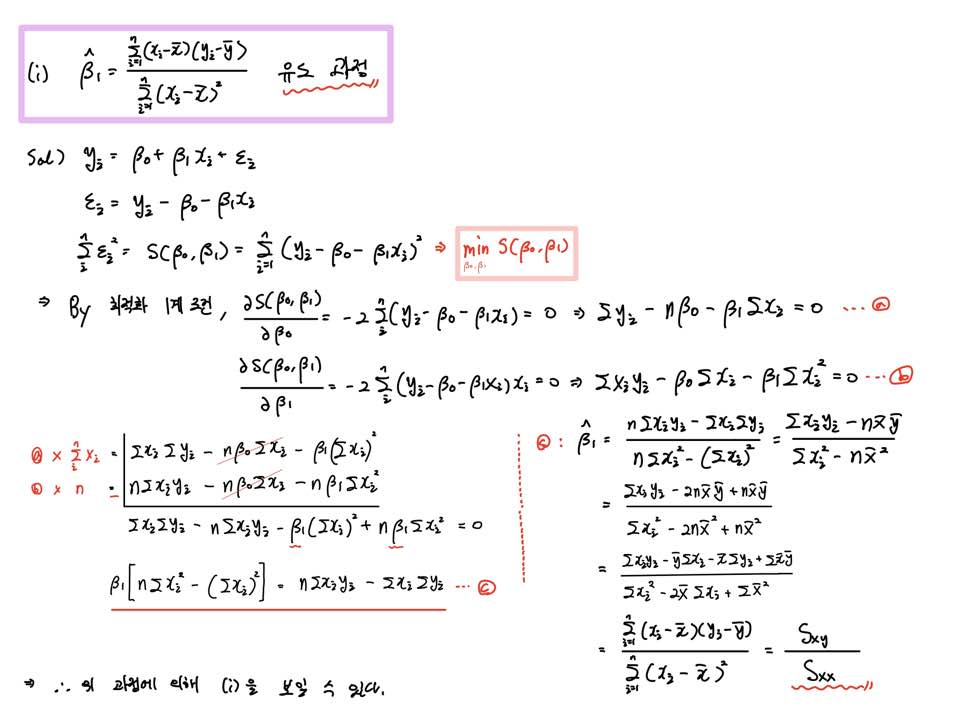
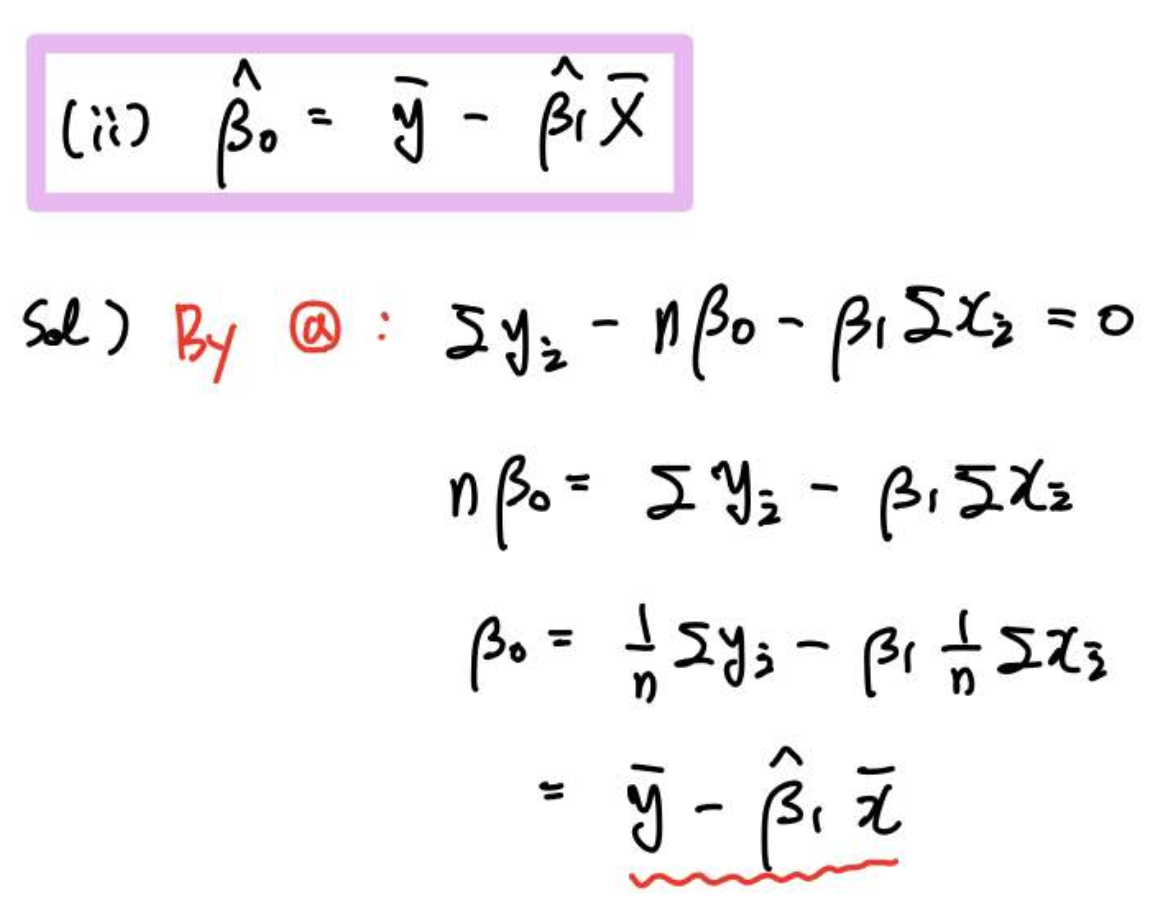
y=b_0+b_1*x 

**Problem 4, Part 2**

Now repeat this experiment 1000 times, always using the same ground truth. You will now have 1000 different values for $\hat{\beta}_1$. Plot these values in a histogram (set the bin size so that it looks nice). Note that for each of these 1000 values of $\hat{\beta}_1$, you need to generate $n=150$ data points, as you did above.

If you do this right, you should have something that looks like a Gaussian. This is telling us that the distribution *of the solution to a regression problem* looks like a Gaussian. Therefore, we can use everything we know about Gaussians, standard deviations, etc., to judge statistical significance.

(array([ 1.,  2.,  0.,  1.,  2.,  7.,  5., 11., 10., 10., 14., 16., 16.,
        22., 38., 29., 28., 38., 53., 42., 49., 39., 66., 58., 51., 46.,
        39., 52., 40., 40., 31., 32., 27., 20., 16., 14., 12.,  5.,  8.,
         5.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.25823928, -0.24698433, -0.23572939, -0.22447445, -0.2132195 ,
        -0.20196456, -0.19070962, -0.17945467, -0.16819973, -0.15694478,
        -0.14568984, -0.1344349 , -0.12317995, -0.11192501, -0.10067006,
        -0.08941512, -0.07816018, -0.06690523, -0.05565029, -0.04439535,
        -0.0331404 , -0.02188546, -0.01063051,  0.00062443,  0.01187937,
         0.02313432,  0.03438926,  0.0456442 ,  0.05689915,  0.06815409,
         0.07940904,  0.09066398,  0.10191892,  0.11317387,  0.12442881,
         0.13568376,  0.1469387 ,  0.15819364,  0.16944859,  0.18070353,
         0.19195847,  0.20321342,  0.21446836,  0.22572331,  0.23697825,
         0.24823319,  0.25948814,  0.27074308,  0.28199802,

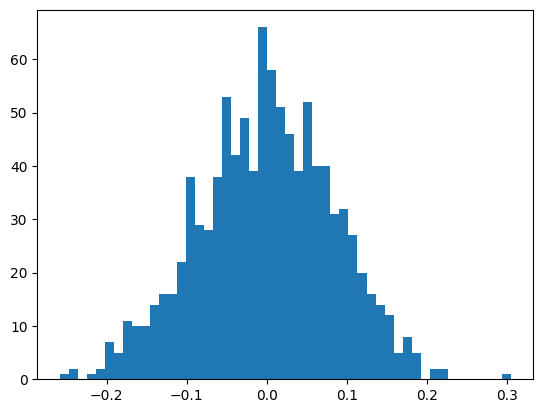

In [262]:
x=np.random.rand(150)

B_list=[]
elist=[]
for i in range(1000):
    
    e=np.random.rand(150)
    y=-3+e
    
    model = LinearRegression().fit(x.reshape(-1,1), y)
    beta_hat_1 = model.coef_[0]
    B_list.append(beta_hat_1)
    
plt.hist(B_list,bins=50)
    
    
# plt.hist(e,bins=100)

As you can see the truth value would be 0. The Central Limit Theorem typically applies to sample means, but here it's generalized to the fact that not only the mean but any linear combination of random variables (like the least squares estimate ) can also approach a normal distribution under some conditions. So, not only sample means but also linear combinations of random variables will tend to a normal distribution, especially when the sample size is large as now(1000).

# Problem 5: Regression and Non-linear Fitting

In this exercise you'll explore two different approaches to fitting non-linear curves through data, but using linear regression (as we also did in class when considering the example of salary vs experience). Download the data in the "auto-mpg.data-original" data set from http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/.
1. Display all pairwise relationships of the data. There are a number of packages that will do this for you. You can use, for example, Pandas, or you can use Seaborn, or something else of your choice.
2.  Now you will explore the relationship between mass and fuel efficiency. First, try to fit a straight line (not necessarily through the origin) to the data, using squared loss as your loss function. That is, try to find the best-fit relationship of the form: ${\rm MPG}  = \beta_0 + \beta_1 {\rm WEIGHT}$.

3. Now fit a quadratic, i.e., a relationship of the form: ${\rm MPG}  = \beta_0 + \beta_1 {\rm WEIGHT}  + \beta_2 {\rm WEIGHT}^2$. Do this in two different ways: (A) Use the numpy.polynomial package and ask it to fit a polynomial of degree 2. Plot the curve you get against the points. (B) Now repeat this, by explicitly adding a column that is the square of the weight, and then using linear (but multiple) regression.



In [293]:
df_auto=pd.read_csv("Lab2Data/auto-mpg.data-original",sep='\s+',header=None)
df_auto.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df_auto


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
401  27.0        4.0         140.0        86.0  2790.0          15.6   
402  44.0        4.0          97.0        52.0  2130.0          24.6   
403  32.0        4.0         135.0        84.0  2295.0          11.6   
404  28.0        4.0         120.0        79.0  2625.0          18.6   
405  31.0        4.0         119.0        82.0  2720.0          19.4   

     model_year  origin                   car_name  
0          70.0     1.0  chevrolet chevelle malibu  
1          70.0     1.0          buick skylark 320  
2          70.0     1.0         plymouth satellite  
3          70.0     1.0              amc rebel sst  
4          70.0     1.0                ford torino  
..          ...     ...                        ...  
401        82.0     1.0            ford mustang gl  
402        82.0     2.0                  vw pickup  
403        82.0     1.0              dodge rampage  
404        82.0     1.0                ford ranger  
405        82.0     1.0                 chevy s-10  

[406 rows x 9 columns]

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.951787    0.844158  0.895220   
displacement -0.804203   0.951787      1.000000    0.898326  0.932475   
horsepower   -0.778427   0.844158      0.898326    1.000000  0.866586   
weight       -0.831741   0.895220      0.932475    0.866586  1.000000   
acceleration  0.420289  -0.522452     -0.557984   -0.697124 -0.430086   
model_year    0.579267  -0.360762     -0.381714   -0.424419 -0.315389   
origin        0.563450  -0.567478     -0.613056   -0.460033 -0.584109   

              acceleration  model_year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.522452   -0.360762 -0.567478  
displacement     -0.557984   -0.381714 -0.613056  
horsepower       -0.697124   -0.424419 -0.460033  
weight           -0.430086   -0.315389 -0.584109  
acceleration      1.000000    0.3019

Text(0.5, 1.0, 'relationship heatmap')

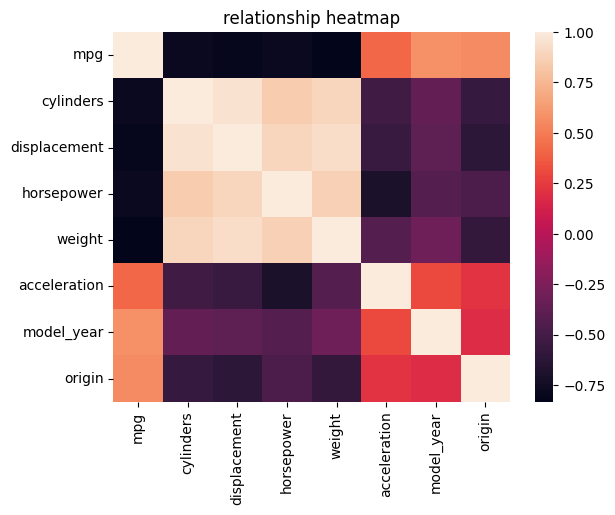

In [307]:
data= df_auto[df_auto.columns[:-1]] #except name of the car

print(data.corr())

sns.heatmap(data.corr())
plt.title("relationship heatmap")

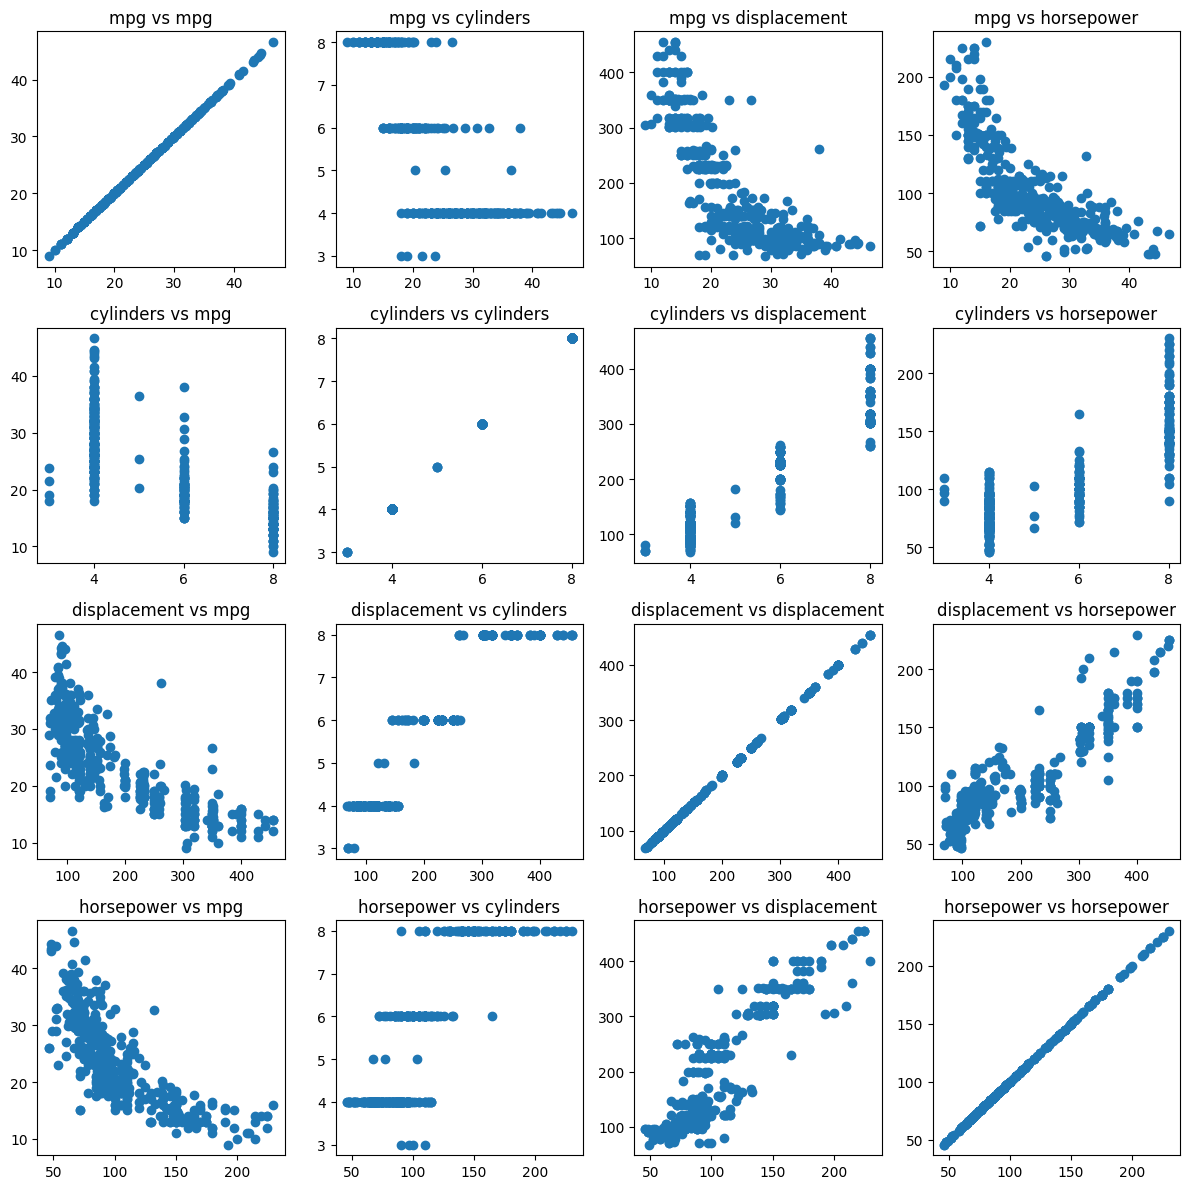

In [294]:
#using pandas to compare all the correlations

fig, axs = plt.subplots(4, 4, figsize=(12, 12))  # Create a 4x4 grid

# Loop through rows and columns of the subplot grid
for i in range(4):
    for j in range(4):
        axs[i, j].scatter(df_auto[df_auto.columns[i]], df_auto[df_auto.columns[j]])
        axs[i, j].set_title(f'{df_auto.columns[i]} vs {df_auto.columns[j]}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

number of na in mpg 8
[-0.00752209] 45.925977462128884


Text(0.5, 1.0, 'regression 1st order model')

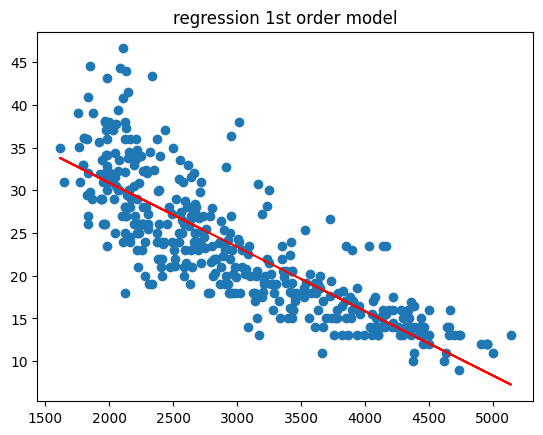

In [364]:
x=df_auto['weight']
y=df_auto['mpg'].fillna(df_auto['mpg'].mean())

print("number of na in mpg",df_auto['mpg'].isna().sum())

x=np.array(x)
y=np.array(y)

model=LinearRegression()
model.fit(x.reshape(-1,1),y)

B_1=model.coef_
B_0=model.intercept_

print(B_1,B_0)

weight=x

mpg=B_0+B_1*weight


plt.plot(weight,mpg,color='r')
plt.scatter(x,y)
plt.title("regression 1st order model")

In [365]:
print(x[50],y[50])
(x**2).shape

4746.0 13.0


(406,)

Now fit a quadratic, i.e., a relationship of the form:  MPG=𝛽0+𝛽1WEIGHT+𝛽2WEIGHT2
Do this in two different ways: (A) Use the numpy.polynomial package and 
ask it to fit a polynomial of degree 2. Plot the curve you get against the points. 
(B) Now repeat this, by explicitly adding a column that is the square of the weight, and 
then using linear (but multiple) regression.

[ 1.65973821e-06 -1.81195709e-02  6.15791408e+01]


Text(0.5, 1.0, 'regression 2nd order model')

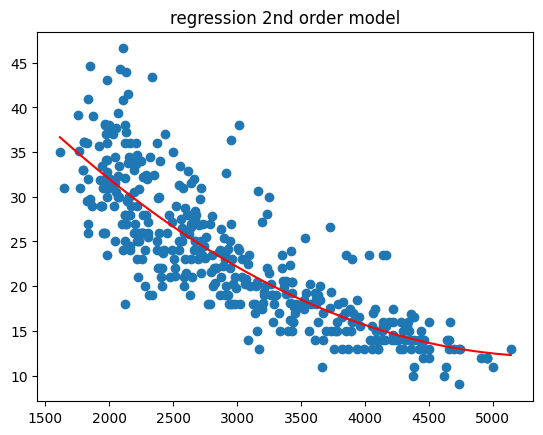

In [368]:
p=np.polyfit(x,y,2)
p
print(p)

X=np.linspace(np.min(weight),np.max(weight),1000)

mpg=p[2]+p[1]*X+p[0]*X**2
plt.plot(X,mpg,color='r')
plt.scatter(x,y)
plt.title("regression 2nd order model")

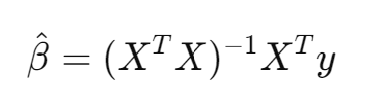

number of na in mpg 8
(406, 3)
[ 6.15791408e+01 -1.81195709e-02  1.65973821e-06]


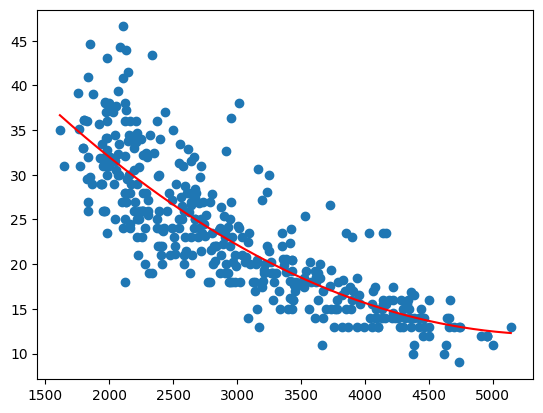

In [392]:
#second method: Multivariate linear regression
# 
x=df_auto['weight']
y=df_auto['mpg'].fillna(df_auto['mpg'].mean())

print("number of na in mpg",df_auto['mpg'].isna().sum())

x=np.array(x)
y=np.array(y)

weight=x

x1=np.ones(len(weight)).reshape(-1,1)
x2=weight.reshape(-1,1) #x
x3=(weight**2).reshape(-1,1) #x**2

x=np.hstack((x1,x2,x3))
print(x.shape)

beta=np.linalg.inv(np.matmul(x.T,x))@x.T@y

beta

#beta[2] is order of 2 in x (opposite of above)
X=np.linspace(np.min(weight),np.max(weight),1000)

mpg=beta[0]+beta[1]*X+beta[2]*X**2
plt.plot(X,mpg,color='r')
x=df_auto['weight']
print(beta)
plt.scatter(x,y)

# Problem 6 (Optional)

Run through the Jupyter Notebook from class on Child IQ and Mom IQ, from the textbook of Gelman and Hill (we will go over this in class this week). You will have to download the data set yourselves. Then do the exercise of adding an interaction term, as left for you at the end of the Jupyter notebook. Explain what you see, and how it relates to the graph you obtain before adding the interaction term. That is, use plots / visualization, to argue convincingly that the interaction term should or shouldn't be there, and then tell us what this means.